<h1><center>Aprendizaje Automático<br>
    Trabajo práctico Nº 2</center></h3>

<center><b>Primer Cuatrimestre 2019</b></center>

<center><i>Federico Moreno - Sofía Perini - Bianca Picchetti (Comisión 2) </i><center>

**1.** A partir del dataset se deben elaborar tres modelos de predicción con distintos métodos de ensamble.<br>

**2.** Se debe informar para cada modelo, TP, FP, TN y FN, Accuracy, Precision, Recall y F1.<br>

**3.** Utilizar 5-fold cross validation habiendo separado anteriormente 20% del dataset para test (de manera aleatoria). Informar cuál es el modelo que mejor performance, demuestre en el conjunto de test.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data_limpio.csv', sep=";")

<h2>Preparación del dataset</h3>

**1.** Tratamiento de datos faltantes.

In [4]:
# Imputación de moda en "Sucursal"
df1 = df.copy()
df1["Sucursal"] = df1["Sucursal"].fillna(df1["Sucursal"].mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   1278 non-null object
Trimestre Entrega          1276 non-null object
Capital Entregado          1278 non-null int64
Cantidad Cuotas            1278 non-null int64
Importe Cuota              1278 non-null float64
Interes Mensual            1278 non-null float64
Zona Residencia            1222 non-null object
Edad                       1209 non-null float64
Nacionalidad               1278 non-null object
Informa Celular            1278 non-null object
Informa Tel Particular     1278 non-null object
Informa Email              1278 non-null object
Informa Tel Alternativo    1278 non-null object
Informa Nombre Jefe        1278 non-null object
Puesto Laboral             1223 non-null object
Ingreso Formal             1264 non-null float64
Sexo                       1278 non-null object
Target                     1278 non-null object
dtypes: float64(4), int64(2

In [5]:
# Borramos los nulos de df1
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1277
Data columns (total 18 columns):
Sucursal                   1101 non-null object
Trimestre Entrega          1101 non-null object
Capital Entregado          1101 non-null int64
Cantidad Cuotas            1101 non-null int64
Importe Cuota              1101 non-null float64
Interes Mensual            1101 non-null float64
Zona Residencia            1101 non-null object
Edad                       1101 non-null float64
Nacionalidad               1101 non-null object
Informa Celular            1101 non-null object
Informa Tel Particular     1101 non-null object
Informa Email              1101 non-null object
Informa Tel Alternativo    1101 non-null object
Informa Nombre Jefe        1101 non-null object
Puesto Laboral             1101 non-null object
Ingreso Formal             1101 non-null float64
Sexo                       1101 non-null object
Target                     1101 non-null object
dtypes: float64(4), int64(2

**2.** Encoding.

In [6]:
# Lista con las variables categóricas
cat1 = df1.dtypes.loc[df1.dtypes=='object'].index
print(cat1)

Index(['Sucursal', 'Trimestre Entrega', 'Zona Residencia', 'Nacionalidad',
       'Informa Celular', 'Informa Tel Particular', 'Informa Email',
       'Informa Tel Alternativo', 'Informa Nombre Jefe', 'Puesto Laboral',
       'Sexo', 'Target'],
      dtype='object')


In [7]:
# Función para encodear
def encoder(df, cat):
    le = preprocessing.LabelEncoder()
    clases = []
    for i in cat:
        df[i]=le.fit_transform(df[i]) 
        clases.append(le.classes_)
    return df, clases

In [8]:
# Aplicamos LabelEncoder
df2, clases2 = encoder(df1.copy(), cat1)

In [9]:
# Verificamos las clases
[[c] for c in clases2]

[[array(['Alem', 'Belgrano', 'Once'], dtype=object)],
 [array(['I', 'II', 'III', 'IV'], dtype=object)],
 [array(['Capital Federal', 'Zona Norte', 'Zona Oeste', 'Zona Sur'],
        dtype=object)],
 [array(['ARGENTINA', 'BOLIVIA', 'BRASIL', 'COLOMBIA', 'PARAGUAY', 'PERU',
         'URUGUAY'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO ', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['NO', 'SI'], dtype=object)],
 [array(['ADMINISTRACION', 'COMERCIO', 'LIMPIEZA Y SEGURIDAD', 'OPERARIO',
         'PORTERO', 'SALUD'], dtype=object)],
 [array(['F', 'M'], dtype=object)],
 [array(['Cumplidor', 'Deudor'], dtype=object)]]

In [10]:
# Verificamos que esté encodeado
df2.head()

,Sucursal,Trimestre Entrega,Capital Entregado,Cantidad Cuotas,Importe Cuota,Interes Mensual,Zona Residencia,Edad,Nacionalidad,Informa Celular,Informa Tel Particular,Informa Email,Informa Tel Alternativo,Informa Nombre Jefe,Puesto Laboral,Ingreso Formal,Sexo,Target
0,2,1,5000,19,750.0,0.10,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
1,2,3,8500,21,1204.0,0.09,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
2,2,3,10000,21,978.0,0.05,2,62.0,6,1,0,0,0,1,2,10000.0,1,0
3,2,3,28000,20,4900.0,0.13,3,62.0,6,1,0,0,0,1,2,10000.0,1,0
7,2,1,6000,11,1174.0,0.10,0,40.0,0,1,1,0,1,1,4,11714.0,1,0


**3.** Balanceo de datos.

In [11]:
# Vemos si está balanceado el dataset en relacion al target. 
print("Datos totales en el dataset : {}".format(df2['Target'].count()))

Ones = df2.groupby('Target')['Target'].count()

print("% de '1' en el dataset (deudores): {}".format(Ones[1]*100.0/len(df2)))
print("% de '0' en el dataset (pagadores): {}".format(Ones[0]*100.0/len(df2)))
print("Nro de '1' en total (deudores): {}".format(Ones[1]))
print("Nro de '0' en total (deudores): {}".format(Ones[0]))

Datos totales en el dataset : 1101
% de '1' en el dataset (deudores): 36.6030881017257
% de '0' en el dataset (pagadores): 63.3969118982743
Nro de '1' en total (deudores): 403
Nro de '0' en total (deudores): 698


In [12]:
#Se procede a borrar los datos positivos a fin de balancear el dataset, filtrando por target=1 y luego los unimos
t1 = df2[df2["Target"]==1].copy()
t0 = df2[df2["Target"]==0].copy()
t0s = t0.sample(frac =.577, random_state=55)

t0s.shape

(403, 18)

In [13]:
df3 = t1.append(t0s)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 15 to 1205
Data columns (total 18 columns):
Sucursal                   806 non-null int32
Trimestre Entrega          806 non-null int32
Capital Entregado          806 non-null int64
Cantidad Cuotas            806 non-null int64
Importe Cuota              806 non-null float64
Interes Mensual            806 non-null float64
Zona Residencia            806 non-null int32
Edad                       806 non-null float64
Nacionalidad               806 non-null int32
Informa Celular            806 non-null int32
Informa Tel Particular     806 non-null int32
Informa Email              806 non-null int32
Informa Tel Alternativo    806 non-null int32
Informa Nombre Jefe        806 non-null int32
Puesto Laboral             806 non-null int32
Ingreso Formal             806 non-null float64
Sexo                       806 non-null int32
Target                     806 non-null int32
dtypes: float64(4), int32(12), int64(2)
memory usage: 81.

In [14]:
print("Datos totales en el dataset : {}".format(df3['Target'].count()))

Ones = df3.groupby('Target')['Target'].count()

print("% de '1' en el dataset (deudores): {}".format(Ones[1]*100.0/len(df3)))
print("% de '0' en el dataset (pagadores): {}".format(Ones[0]*100.0/len(df3)))
print("Nro de '1' en total (deudores): {}".format(Ones[1]))
print("Nro de '0' en total (deudores): {}".format(Ones[0]))

Datos totales en el dataset : 806
% de '1' en el dataset (deudores): 50.0
% de '0' en el dataset (pagadores): 50.0
Nro de '1' en total (deudores): 403
Nro de '0' en total (deudores): 403


**4.** Partición de datos.<br>

Trabajamos sobre **df3**: dataset con moda imputada en sucursal, nulos borrados (15%), balanceado y encodeado.

In [15]:
X_final = df3.drop('Target',axis=1).copy()
y_final = df3['Target'].copy()

In [16]:
# Separamos 80-20 en "Desarrollo" y "Test"
X_dev, X_test, y_dev, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=55)

A partir de acá usamos **X_dev**: es el 80% de los datos que separaremos en "entrenamiento" y "validación" para los árboles siguientes.

<h2>DESARROLLO</h2>

In [17]:
# Función para el gráfico de la tabla de confusion de validación
def confusion(ytest, y_pred):
    names = ["Pagador","Deudor"]
    cm = confusion_matrix(ytest, y_pred)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=.5, linecolor="w", fmt=".0f", ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

<h2>Modelo 1: Random Forest</h2>

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Definimos los grupos de atributos y target
Xs = X_dev.copy()
ys = y_dev.copy()

In [20]:
# Separamos en set de entrenamiento y de validación
Xs_train, Xs_val, ys_train, ys_val = train_test_split(Xs, ys, test_size=0.20, random_state=55)

**Búsqueda de parámetros:** buscamos los mejores parámetros en base a lo obtenido en el trabajo anterior: máxima profundidad 8 e information gain.

DecisionTreeClassifier<br>
(class_weight=None, <br>
**criterion='entropy'**, <br>
**max_depth=8**,<br>
max_features=None, <br>
max_leaf_nodes=None,<br>
min_impurity_decrease=0.0, <br>
min_impurity_split=None,<br>
min_samples_leaf=1, <br>
min_samples_split=2,<br>
min_weight_fraction_leaf=0.0, <br>
presort=False,<br>
**random_state=55**,<br>
splitter='best')<br>

**Entrenamiento RF1:** Realizamos un RF sólo con esos parámetros fijos, los demás los dejamos por defecto.

In [21]:
modeloRF1 = RandomForestClassifier(random_state=55, criterion="entropy", max_depth=8)
modeloRF1.fit(Xs_train, ys_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

**Performance RF1:** Calculamos las métricas. 5-Fold CV con F1-score.

In [22]:
# 5-Folds Cross Validation
X_cv = Xs.copy()
y_cv = ys.copy()
modelo = modeloRF1
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valRF1 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valRF1,3))

[0.686, 0.621, 0.571, 0.62, 0.555]
Performance f1-score: 0.611


In [23]:
modeloRF1.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 55,
 'verbose': 0,
 'warm_start': False}

In [24]:
# Las predicciones del modelo
predRF1 = modeloRF1.predict(Xs_val)

# Accuracy
acc_valRF1 = accuracy_score(ys_val, predRF1)

# Recall
rec_valRF1 = recall_score(ys_val, predRF1) 

# Precision
prec_valRF1 = precision_score(ys_val, predRF1) 

# F1
f1_valRF1 = f1_score(ys_val, predRF1)

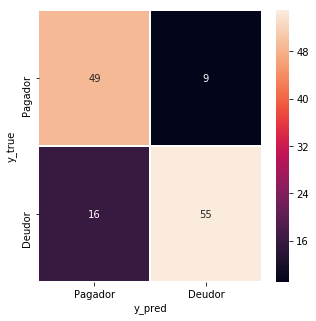

In [25]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valRF1 = confusion_matrix(ys_val, predRF1)

# Los valores de la matriz
FP_valRF1 = cm_valRF1[1,0]
FN_valRF1 = cm_valRF1[0,1]
TP_valRF1 = cm_valRF1[0,0]
TN_valRF1 = cm_valRF1[1,1]

# Gráfico de la tabla
confusion(ys_val, predRF1)

[Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Informa Celular')]

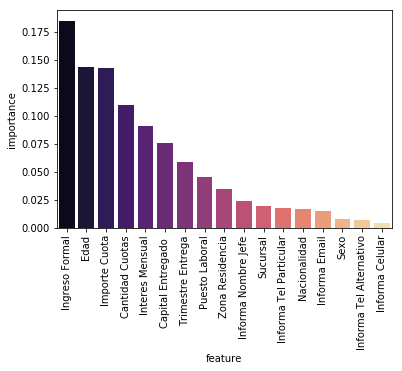

In [26]:
# Importancia de los atributos en el modelo
importancesRF1 = list(zip(modeloRF1.feature_importances_, df.columns))
importancesRF1.sort(reverse=True)
importancesRF1 = pd.DataFrame(importancesRF1)
importancesRF1.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importancesRF1, palette="magma").set_xticklabels(list(importancesRF1["feature"]), rotation=90)

**Random Search:** búsqueda al azar para determinar parámetros del RF. Lo hicemos varias veces variando el valor de **Bootstrap** (True, False) y siempre dio True. A partir de eso variamos **max_features** y **n_estimators**.

In [27]:
param_grid1 = {'n_estimators': np.arange(10,1101,1),
              'max_features': ["sqrt", "log2", None]}

print(param_grid1)

{'n_estimators': array([  10,   11,   12, ..., 1098, 1099, 1100]), 'max_features': ['sqrt', 'log2', None]}


In [28]:
rf_RS = RandomizedSearchCV(RandomForestClassifier(criterion="entropy", max_depth=8, random_state=55, bootstrap=True), 
                           param_grid1, scoring="f1", cv=5, n_iter=20, n_jobs = -1, iid=False, verbose=10)

In [119]:
rf_RS.fit(Xs_train, ys_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False),
          fit_params=None, iid=False, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': array([  10,   11, ..., 1099, 1100]), 'max_features': ['sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=10)

In [120]:
print(rf_RS.best_score_)
print(rf_RS.best_params_)

0.6042290152195813
{'n_estimators': 539, 'max_features': 'sqrt'}


Se realizó la búsqueda repetidas veces, obteniendo en su mayoría **max_feature="sqrt"**.

**Entrenamiento RF2:** entrenamos el modelo con uno de los resultandos de RS (n_estimators=800, bootstrap=True, max_feature="sqrt")

In [29]:
modeloRF2 = RandomForestClassifier(random_state=55, criterion="entropy", max_depth=8,bootstrap=True, max_features="sqrt", n_estimators=800)
modeloRF2.fit(Xs_train, ys_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

**Performance RF2:** Calculamos las métricas. 5-Fold CV con F1-score.

In [30]:
# 5-Folds Cross Validation
X_cv = Xs.copy()
y_cv = ys.copy()
modelo = modeloRF2
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valRF2 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valRF2,3))

[0.701, 0.657, 0.588, 0.642, 0.624]
Performance f1-score: 0.642


In [31]:
# Las predicciones del modelo
predRF2 = modeloRF2.predict(Xs_val)

# Accuracy
acc_valRF2 = accuracy_score(ys_val, predRF2)

# Recall
rec_valRF2 = recall_score(ys_val, predRF2) 

# Precision
prec_valRF2 = precision_score(ys_val, predRF2) 

# F1
f1_valRF2 = f1_score(ys_val, predRF2)

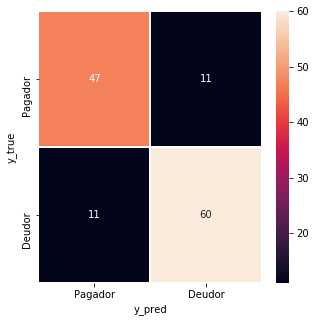

In [32]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valRF2 = confusion_matrix(ys_val, predRF2)

# Los valores de la matriz
FP_valRF2 = cm_valRF2[1,0]
FN_valRF2 = cm_valRF2[0,1]
TP_valRF2 = cm_valRF2[0,0]
TN_valRF2 = cm_valRF2[1,1]

# Gráfico de la matriz
confusion(ys_val, predRF2)

[Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Informa Celular')]

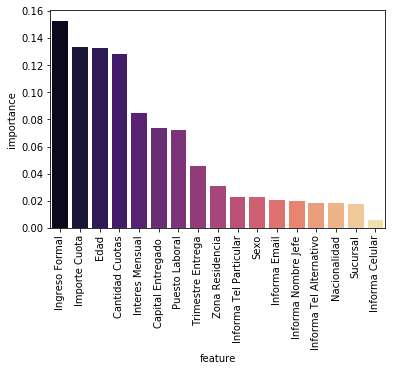

In [33]:
# Importancia de los atributos en el modelo
importancesRF2 = list(zip(modeloRF2.feature_importances_, df.columns))
importancesRF2.sort(reverse=True)
importancesRF2 = pd.DataFrame(importancesRF2)
importancesRF2.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importancesRF2, palette="magma").set_xticklabels(list(importancesRF2["feature"]), rotation=90)

**Grid Search:** Fijamos los nuevos parámetros y hacemos unas búsqueda más fina con la cantidad de árboles.

In [34]:
param_grid2 = {'n_estimators': np.arange(10,900,1)}

In [35]:
RF_GS1 = GridSearchCV(RandomForestClassifier(criterion="entropy", max_depth=8, bootstrap=True, max_features = "sqrt", random_state=55), 
                                             param_grid2, scoring="f1", cv=5, n_jobs = -1, iid=False, verbose=10)

In [129]:
RF_GS1.fit(Xs_train, ys_train)

Fitting 5 folds for each of 890 candidates, totalling 4450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0312s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0565s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1996s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 452 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 563 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': array([ 10,  11, ..., 898, 899])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [130]:
print(RF_GS1.best_score_)
print(RF_GS1.best_params_)

0.621538873277131
{'n_estimators': 13}


**Entrenamiento RF3:** entrenamos el modelo con los parámetros encontrados mediante GS (n_estimators=13).

In [36]:
modeloRF3 = RandomForestClassifier(criterion="entropy", max_depth=8, bootstrap=True, max_features = "sqrt", random_state=55, n_estimators=13)
modeloRF3.fit(Xs_train,ys_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

**Performance RF3:** Calculamos las métricas. 5-Fold CV con F1-score.

In [37]:
# 5-Folds Cross Validation
X_cv = Xs.copy()
y_cv = ys.copy()
modelo = modeloRF3
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valRF3 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valRF3,3))

[0.705, 0.672, 0.562, 0.626, 0.579]
Performance f1-score: 0.629


In [38]:
# Las predicciones del modelo
predRF3 = modeloRF3.predict(Xs_val)

# Accuracy
acc_valRF3 = accuracy_score(ys_val, predRF3)

# Recall
rec_valRF3 = recall_score(ys_val, predRF3) 

# Precision
prec_valRF3 = precision_score(ys_val, predRF3) 

# F1
f1_valRF3 = f1_score(ys_val, predRF3)

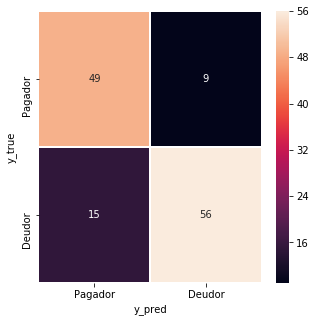

In [39]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valRF3 = confusion_matrix(ys_val, predRF3)

# Los valores de la matriz
FP_valRF3 = cm_valRF3[1,0]
FN_valRF3 = cm_valRF3[0,1]
TP_valRF3 = cm_valRF3[0,0]
TN_valRF3 = cm_valRF3[1,1]

# Gráfico de la matrix
confusion(ys_val, predRF3)

[Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Informa Celular')]

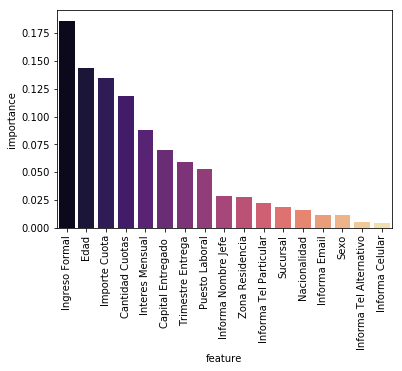

In [40]:
# Importancia de los atributos en el modelo
importancesRF3 = list(zip(modeloRF3.feature_importances_, df.columns))
importancesRF3.sort(reverse=True)
importancesRF3 = pd.DataFrame(importancesRF3)
importancesRF3.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importancesRF3, palette="magma").set_xticklabels(list(importancesRF3["feature"]), rotation=90)

**Resumen de modelos:** tabla comparativa de performance de modelos RF en validación.

In [41]:
performance_valRF1 = [TP_valRF1, FP_valRF1, TN_valRF1, FN_valRF1, cv_valRF1, acc_valRF1, rec_valRF1, prec_valRF1, f1_valRF1]
performance_valRF2 = [TP_valRF2, FP_valRF2, TN_valRF2, FN_valRF2, cv_valRF2, acc_valRF2, rec_valRF2, prec_valRF2, f1_valRF2]
performance_valRF3 = [TP_valRF3, FP_valRF3, TN_valRF3, FN_valRF3, cv_valRF3, acc_valRF3, rec_valRF3, prec_valRF3, f1_valRF3]

In [42]:
Medidas = ("TP", "FP", "TN", "FN", "5-folds CV (F1)", "Accuracy", "Recall", "Precision", "F1-Socre")

Tabla_per1 = pd.DataFrame({"Medidas": Medidas, "RF1": performance_valRF1,"RF2": performance_valRF2,"RF3": performance_valRF3})

round(Tabla_per1,3)

,Medidas,RF1,RF2,RF3
0,TP,49.000,47.000,49.000
1,FP,16.000,11.000,15.000
2,TN,55.000,60.000,56.000
3,FN,9.000,11.000,9.000
4,5-folds CV (F1),0.611,0.642,0.629
5,Accuracy,0.806,0.829,0.814
6,Recall,0.775,0.845,0.789
7,Precision,0.859,0.845,0.862
8,F1-Socre,0.815,0.845,0.824


<h2>Modelo 2: AdaBoost</h2>

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [44]:
Xs1 = X_dev.copy()
ys1 = y_dev.copy()

In [45]:
Xs1_train, Xs1_val, ys1_train, ys1_val = train_test_split(Xs1, ys1, test_size=0.20, random_state=55)

**Búsqueda de parámetros:** buscamos los mejores parámetros.

**Entrenamiento AB1:** realizamos un AB con los parámetros por default.

In [46]:
modeloAB1 = AdaBoostClassifier(random_state=55)
modeloAB1.fit(Xs1_train, ys1_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=55)

**Performance AB1:** Calculamos las métricas. 5-Fold CV con F1-score.

In [47]:
# 5-Folds Cross Validation
X_cv = Xs1.copy()
y_cv = ys1.copy()
modelo = modeloAB1
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valAB1 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valAB1,3))

[0.618, 0.612, 0.565, 0.605, 0.585]
Performance f1-score: 0.597


In [48]:
# Las predicciones del modelo
predAB1 = modeloAB1.predict(Xs1_val)

# Accuracy
acc_valAB1 = accuracy_score(ys1_val, predAB1)

# Recall
rec_valAB1 = recall_score(ys1_val, predAB1) 

# Precision
prec_valAB1 = precision_score(ys1_val, predAB1) 

# F1
f1_valAB1 = f1_score(ys1_val, predAB1)

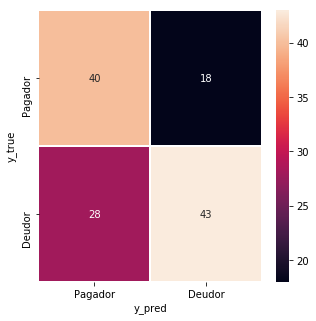

In [49]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valAB1 = confusion_matrix(ys1_val, predAB1)

# Los valores de la matriz
FP_valAB1 = cm_valAB1[1,0]
FN_valAB1 = cm_valAB1[0,1]
TP_valAB1 = cm_valAB1[0,0]
TN_valAB1 = cm_valAB1[1,1]

# Gráfico de la matriz
confusion(ys1_val, predAB1)

In [50]:
modeloAB1.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 55}

**Grid Search 1:** hacemos una búsqueda pasa el elegir el estimador de AB.

In [187]:
# Clasificadores de SKLearn que se pueden usar con AdaBoost
import inspect
from sklearn.utils.testing import all_estimators
for name, clf in all_estimators(type_filter='classifier'):
    if 'sample_weight' in inspect.getargspec(clf().fit)[0]:
       print(name)

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
ComplementNB
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


In [59]:
# Nuestro árbol del TP1
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=8, max_features="sqrt", random_state=55)

# Un árbol con los parámetros por defecto
dtree1 = DecisionTreeClassifier(random_state=55)

# Naive Bayes
nb = GaussianNB()
                       
param_grid3 = {'base_estimator': [dtree, dtree1, nb]} 

In [60]:
AB_GS = GridSearchCV(AdaBoostClassifier(random_state=55), param_grid3, scoring="f1", cv=3, n_jobs = -1, iid=False)

In [33]:
AB_GS.fit(Xs1_train, ys1_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=55),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight...False, random_state=55,
            splitter='best'), GaussianNB(priors=None, var_smoothing=1e-09)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [34]:
print(AB_GS.best_score_)
print(AB_GS.best_params_)

0.6139347551886252
{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')}


**Entrenamiento AB2:** El mejor estimador parece ser el árbol de decisión del TP1, por lo que se optó por elegir este como estimador.  

In [83]:
modeloAB2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features="sqrt",
                                                                        random_state=55), random_state=55)

In [84]:
modeloAB2.fit(Xs1_train, ys1_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=55)

**Performance AB2:** Calculamos las métricas. 5-Fold CV con F1-score.

In [85]:
# 5-Folds Cross Validation
X_cv = Xs1.copy()
y_cv = ys1.copy()
modelo = modeloAB2
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valAB2 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valAB2,3))

[0.623, 0.647, 0.635, 0.556, 0.688]
Performance f1-score: 0.63


In [86]:
# Las predicciones del modelo
predAB2 = modeloAB2.predict(Xs1_val)

# Accuracy
acc_valAB2 = accuracy_score(ys1_val, predAB2)

# Recall
rec_valAB2 = recall_score(ys1_val, predAB2) 

# Precision
prec_valAB2 = precision_score(ys1_val, predAB2) 

# F1
f1_valAB2 = f1_score(ys1_val, predAB2)

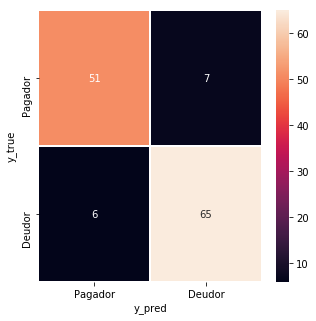

In [87]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valAB2 = confusion_matrix(ys1_val, predAB2)

# Los valores de la matriz
FP_valAB2 = cm_valAB2[1,0]
FN_valAB2 = cm_valAB2[0,1]
TP_valAB2 = cm_valAB2[0,0]
TN_valAB2 = cm_valAB2[1,1]

# Gráfico de la matriz
confusion(ys1_val, predAB2)

**Grid Search 2:** hacemos una búsqueda para la cantidad de estimadors de AB.

In [88]:
param_grid4 = {"n_estimators": np.arange(50,500,1)}

DTC = DecisionTreeClassifier(criterion="entropy", random_state = 55, max_features="sqrt", max_depth=8)
ABC = AdaBoostClassifier(base_estimator = DTC)

AB_GS2 = GridSearchCV(ABC, param_grid=param_grid4, scoring = 'f1', cv=5, n_jobs = -1, iid=False, verbose=10)

In [173]:
AB_GS2.fit(Xs1_train, ys1_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': array([ 50,  51, ..., 498, 499])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [174]:
print(AB_GS2.best_score_)
print(AB_GS2.best_params_)

0.6550418148610977
{'n_estimators': 198}


**Entrenamiento AB3:** Entrenamos el modelo con los parámetros encontrados mediante GS (n_estimators=198)

In [89]:
# Entrenamos el modelo
modeloAB3 = AdaBoostClassifier(base_estimator = DTC, n_estimators=198, random_state=55)
modeloAB3.fit(Xs1_train, ys1_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best'),
          learning_rate=1.0, n_estimators=198, random_state=55)

In [90]:
# Las predicciones del modelo
predAB3 = modeloAB3.predict(Xs1_val)

**Performance AB3:** Calculamos las métricas. 5-Fold CV con F1-score.

In [91]:
# 5-Folds Cross Validation
X_cv = Xs1.copy()
y_cv = ys1.copy()
modelo = modeloAB3
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valAB3 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valAB3,3))

[0.657, 0.657, 0.603, 0.617, 0.702]
Performance f1-score: 0.647


In [92]:
# Las predicciones del modelo
predAB3 = modeloAB3.predict(Xs1_val)

# Accuracy
acc_valAB3 = accuracy_score(ys1_val, predAB3)

# Recall
rec_valAB3 = recall_score(ys1_val, predAB3) 

# Precision
prec_valAB3 = precision_score(ys1_val, predAB3) 

# F1
f1_valAB3 = f1_score(ys1_val, predAB3)

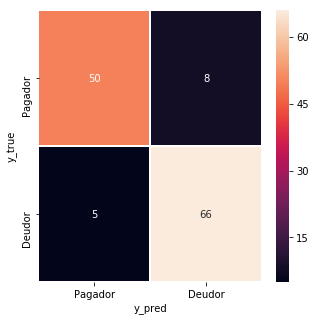

In [148]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valAB3 = confusion_matrix(ys1_val, predAB3)

# Los valores de la matriz
FP_valAB3 = cm_valAB3[1,0] 
FN_valAB3 = cm_valAB3[0,1]
TP_valAB3 = cm_valAB3[0,0]
TN_valAB3 = cm_valAB3[1,1]

# Gráfico de la matrix
confusion(ys1_val, predAB3)

[Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Informa Celular'),
 Text(0, 0, 'Nacionalidad')]

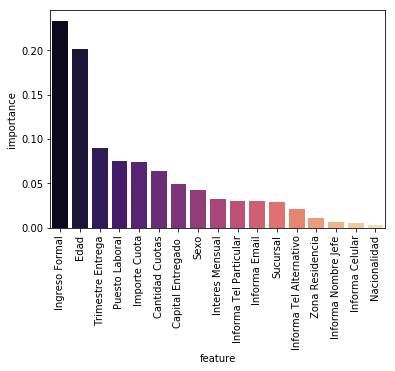

In [149]:
# Importancia de los atributos en el modelo
importancesAB3 = list(zip(modeloAB3.feature_importances_, df.columns))
importancesAB3.sort(reverse=True)
importancesAB3 = pd.DataFrame(importancesAB3)
importancesAB3.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importancesAB3, palette="magma").set_xticklabels(list(importancesAB3["feature"]), rotation=90)

**Resumen de modelos:** tabla comparativa de performance de modelos AB en validación.

In [94]:
performance_valAB1 = [TP_valAB1, FP_valAB1, TN_valAB1, FN_valAB1, cv_valAB1, acc_valAB1, rec_valAB1, prec_valAB1, f1_valAB1]
performance_valAB2 = [TP_valAB2, FP_valAB2, TN_valAB2, FN_valAB2, cv_valAB2, acc_valAB2, rec_valAB2, prec_valAB2, f1_valAB2]
performance_valAB3 = [TP_valAB3, FP_valAB3, TN_valAB3, FN_valAB3, cv_valAB3, acc_valAB3, rec_valAB3, prec_valAB3, f1_valAB3]

In [95]:
Medidas = ("TP", "FP", "TN", "FN", "5-folds CV (F1)", "Accuracy", "Recall", "Precision", "F1-Socre")

Tabla_per2 = pd.DataFrame({"Medidas": Medidas, "AB1": performance_valAB1,"AB2": performance_valAB2,"AB3": performance_valAB3})

round(Tabla_per2,3)

,Medidas,AB1,AB2,AB3
0,TP,40.000,51.000,50.000
1,FP,28.000,6.000,5.000
2,TN,43.000,65.000,66.000
3,FN,18.000,7.000,8.000
4,5-folds CV (F1),0.597,0.630,0.647
5,Accuracy,0.643,0.899,0.899
6,Recall,0.606,0.915,0.930
7,Precision,0.705,0.903,0.892
8,F1-Socre,0.652,0.909,0.910


<h2>Modelo 3: XGBoost </h2>

In [100]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [101]:
Xs2 = X_dev.copy()
ys2 = y_dev.copy()

In [102]:
Xs2_train, Xs2_val, ys2_train, ys2_val = train_test_split(Xs2, ys2, test_size=0.20, random_state=55)

**Entrenamiento XGB1:** Entrenamos un modelo con los parámetros default.

In [103]:
modeloXGB1 = xgb.XGBClassifier(random_state=55, seed=55)

In [104]:
modeloXGB1.fit(Xs2_train, ys2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=55, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=55, silent=None, subsample=1,
       verbosity=1)

**Performance XGB1:** Calculamos las métricas. 5-Fold CV con F1-score.

In [105]:
# 5-Folds Cross Validation
X_cv = Xs2.copy()
y_cv = ys2.copy()
modelo = modeloXGB1
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valXGB1 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valXGB1,3))

[0.656, 0.632, 0.56, 0.611, 0.608]
Performance f1-score: 0.614


In [106]:
Xs2 = X_dev.copy()
ys2 = y_dev.copy()
Xs2_train, Xs2_val, ys2_train, ys2_val = train_test_split(Xs2, ys2, test_size=0.20, random_state=55)
modeloXGB1 = xgb.XGBClassifier(random_state=55, seed=55)
modeloXGB1.fit(Xs2_train, ys2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=55, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=55, silent=None, subsample=1,
       verbosity=1)

In [107]:
# Las predicciones del modelo
predXGB1 = modeloXGB1.predict(Xs2_val)

# Accuracy
acc_valXGB1 = accuracy_score(ys2_val, predXGB1)

# Recall
rec_valXGB1 = recall_score(ys2_val, predXGB1) 

# Precision
prec_valXGB1 = precision_score(ys2_val, predXGB1) 

# F1
f1_valXGB1 = f1_score(ys2_val, predXGB1)

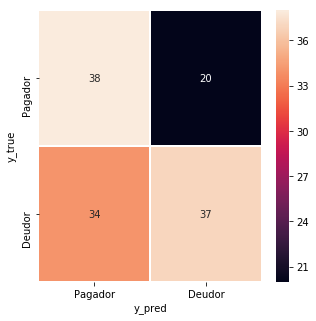

In [108]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valXGB1 = confusion_matrix(ys2_val, predXGB1)

# Los valores de la matriz
FP_valXGB1 = cm_valXGB1[1,0]
FN_valXGB1 = cm_valXGB1[0,1]
TP_valXGB1 = cm_valXGB1[0,0]
TN_valXGB1 = cm_valXGB1[1,1]

# Gráfico de la matrix
confusion(ys2_val, predXGB1)

In [109]:
modeloXGB1.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 55,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 55,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

**Entrenamiento XGB2:** Entrenamos un modelo con los parámetros del árbol que mejor nos dieron: max_feature=sqrt (acá se llama colsample_bytree), max_depth=8. Los demás parámetros los dejamos por defecto.

In [110]:
modeloXGB2 = xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, criterion="entropy")

In [111]:
modeloXGB2.fit(Xs2_train, ys2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1)

**Performance XGB2:** Calculamos las métricas. 5-Fold CV con F1-score.

In [112]:
# 5-Folds Cross Validation
X_cv = Xs2.copy()
y_cv = ys2.copy()
modelo = modeloXGB2
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valXGB2 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valXGB2,3))

[0.676, 0.647, 0.56, 0.662, 0.597]
Performance f1-score: 0.628


In [113]:
Xs2 = X_dev.copy()
ys2 = y_dev.copy()
Xs2_train, Xs2_val, ys2_train, ys2_val = train_test_split(Xs2, ys2, test_size=0.20, random_state=55)
modeloXGB2 = xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357)
modeloXGB2.fit(Xs2_train, ys2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1)

In [114]:
# Las predicciones del modelo
predXGB2 = modeloXGB2.predict(Xs2_val)

# Accuracy
acc_valXGB2 = accuracy_score(ys2_val, predXGB2)

# Recall
rec_valXGB2 = recall_score(ys2_val, predXGB2) 

# Precision
prec_valXGB2 = precision_score(ys2_val, predXGB2) 

# F1
f1_valXGB2 = f1_score(ys2_val, predXGB2)

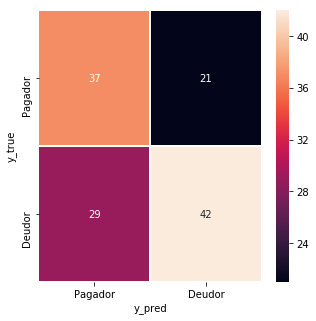

In [115]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valXGB2 = confusion_matrix(ys2_val, predXGB2)

# Los valores de la matriz
FP_valXGB2 = cm_valXGB2[1,0]
FN_valXGB2 = cm_valXGB2[0,1]
TP_valXGB2 = cm_valXGB2[0,0]
TN_valXGB2 = cm_valXGB2[1,1]

# Gráfico de la matrix
confusion(ys2_val, predXGB2)

In [116]:
modeloXGB2.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.2357,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 55,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 55,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

**Grid Search 1:** vamos ajustando de a un parámetro. Usamos los parámetros del árbol que mejor nos dio, Fijamos n_estimators=1000, gamma=0, learning_rate=0.1. Ajustamos **min_child_weight**.

In [93]:
param_grid5 = {'min_child_weight':np.arange(1,6,1)}

print(param_grid5)

{'min_child_weight': array([1, 2, 3, 4, 5])}


In [94]:
XGB_GS1 = GridSearchCV(xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, n_estimators=1000, gamma=0, learning_rate=0.1, criterion="entropy"), 
                           param_grid5, scoring="f1", cv=5, n_jobs = -1, iid=False, verbose=10)

In [69]:
XGB_GS1.fit(Xs_train, ys_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_child_weight': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [70]:
print(XGB_GS1.best_score_)
print(XGB_GS1.best_params_)

0.5984816555050001
{'min_child_weight': 2}


**Grid Search 2:** Fijamos min_child_weight=2, n_estimators=1000, learning_rate=0.1. Ajustamos **gamma**.

In [95]:
param_grid6 = {'gamma':[i/10.0 for i in range(0,5)]}

print(param_grid6)

{'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]}


In [96]:
XGB_GS2 = GridSearchCV(xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, min_child_weight=2, n_estimators=1000, learning_rate=0.1, criterion="entropy"), 
                           param_grid6, scoring="f1", cv=5, n_jobs = -1, iid=False, verbose=10)

In [74]:
XGB_GS2.fit(Xs_train, ys_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [75]:
print(XGB_GS2.best_score_)
print(XGB_GS2.best_params_)

0.6153842298238146
{'gamma': 0.4}


**Grid Search 3:** Fijamos gamma=0.4, min_child_weight=2, n_estimators=1000. Ajustamos **learning_rate**.

In [97]:
param_grid7 = {'learning_rate':np.arange(0.01,0.3,0.01)}

print(param_grid7)

{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])}


In [77]:
XGB_GS3 = GridSearchCV(xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, min_child_weight=2, n_estimators=1000, gamma=0.4,criterion="entropy"), 
                           param_grid7, scoring="f1", cv=5, n_jobs = -1, iid=False, verbose=10)

In [78]:
XGB_GS3.fit(Xs_train, ys_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   19.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [79]:
print(XGB_GS3.best_score_)
print(XGB_GS3.best_params_)

0.6214928741401542
{'learning_rate': 0.24000000000000002}


**Grid Search 4:** Fijamos learning_rate=0.24, gamma=0.4, min_child_weight=2. Ajustamos **n_estimators**.

In [80]:
param_grid8 = {'n_estimators':np.arange(100,2001,1)}

print(param_grid8)

{'n_estimators': array([ 100,  101,  102, ..., 1998, 1999, 2000])}


In [83]:
XGB_GS4 = GridSearchCV(xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, min_child_weight=2, gamma=0.4, learning_rate=0.24, criterion="entropy"), 
                           param_grid8, scoring="f1", cv=5, n_jobs = -1, iid=False, verbose=10)

In [84]:
XGB_GS4.fit(Xs_train, ys_train)

Fitting 5 folds for each of 1901 candidates, totalling 9505 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0936s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1331s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    8.2s
[Parallel(n_jo

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0.4, learning_rate=0.24, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': array([ 100,  101, ..., 1999, 2000])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [86]:
print(XGB_GS4.best_score_)
print(XGB_GS4.best_params_)

0.6270180542175257
{'n_estimators': 548}


**Entrenamiento XGB3:** Entrenamos el modelo con los parámetros encontrados.

In [117]:
modeloXGB3 = xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, min_child_weight=2, gamma=0.4, learning_rate=0.24, n_estimators=548, criterion="entropy")

In [118]:
modeloXGB3.fit(Xs2_train, ys2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0.4, learning_rate=0.24, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=548, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1)

**Performance XGB3:** Calculamos las métricas. 5-Fold CV con F1-score.

In [119]:
# 5-Folds Cross Validation
X_cv = Xs2.copy()
y_cv = ys2.copy()
modelo = modeloXGB3
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_valXGB3 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_valXGB3,3))

[0.695, 0.642, 0.579, 0.677, 0.608]
Performance f1-score: 0.64


In [120]:
Xs2 = X_dev.copy()
ys2 = y_dev.copy()
Xs2_train, Xs2_val, ys2_train, ys2_val = train_test_split(Xs2, ys2, test_size=0.20, random_state=55)
modeloXGB3 = xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, min_child_weight=2, gamma=0.4, learning_rate=0.24, n_estimators=548)
modeloXGB3.fit(Xs2_train, ys2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, gamma=0.4,
       learning_rate=0.24, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=548, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1)

In [121]:
# Las predicciones del modelo
predXGB3 = modeloXGB3.predict(Xs2_val)

# Accuracy
acc_valXGB3 = accuracy_score(ys2_val, predXGB3)

# Recall
rec_valXGB3 = recall_score(ys2_val, predXGB3) 

# Precision
prec_valXGB3 = precision_score(ys2_val, predXGB3) 

# F1
f1_valXGB3 = f1_score(ys2_val, predXGB3)

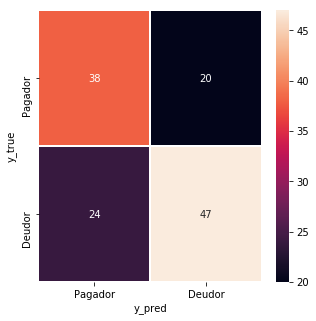

In [122]:
# La matriz de confusión (TP, FP, TN, FN)
cm_valXGB3 = confusion_matrix(ys2_val, predXGB3)

# Los valores de la matriz
FP_valXGB3 = cm_valXGB3[1,0]
FN_valXGB3 = cm_valXGB3[0,1]
TP_valXGB3 = cm_valXGB3[0,0]
TN_valXGB3 = cm_valXGB3[1,1]

# Gráfico de la matrix
confusion(ys2_val, predXGB3)

[Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Informa Celular')]

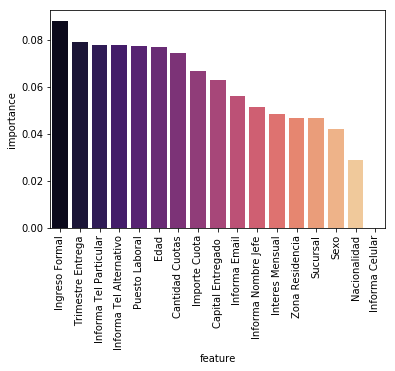

In [123]:
# Importancia de los atributos en el modelo
importancesXGB3 = list(zip(modeloXGB3.feature_importances_, df.columns))
importancesXGB3.sort(reverse=True)
importancesXGB3 = pd.DataFrame(importancesXGB3)
importancesXGB3.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importancesXGB3, palette="magma").set_xticklabels(list(importancesXGB3["feature"]), rotation=90)

**Resumen de modelos:** tabla comparativa de performance de modelos XGB en validación.

In [124]:
performance_valXGB1 = [TP_valXGB1, FP_valXGB1, TN_valXGB1, FN_valXGB1, cv_valXGB1, acc_valXGB1, rec_valXGB1, prec_valXGB1, f1_valXGB1]
performance_valXGB2 = [TP_valXGB2, FP_valXGB2, TN_valXGB2, FN_valXGB2, cv_valXGB2, acc_valXGB2, rec_valXGB2, prec_valXGB2, f1_valXGB2]
performance_valXGB3 = [TP_valXGB3, FP_valXGB3, TN_valXGB3, FN_valXGB3, cv_valXGB3, acc_valXGB3, rec_valXGB3, prec_valXGB3, f1_valXGB3]

In [125]:
Medidas = ("TP", "FP", "TN", "FN", "5-folds CV (F1)", "Accuracy", "Recall", "Precision", "F1-Socre")

Tabla_per3 = pd.DataFrame({"Medidas": Medidas,"XGB1": performance_valXGB1, "XGB2": performance_valXGB2,"XGB3": performance_valXGB3})

round(Tabla_per3,3)

,Medidas,XGB1,XGB2,XGB3
0,TP,38.000,37.000,38.000
1,FP,34.000,29.000,24.000
2,TN,37.000,42.000,47.000
3,FN,20.000,21.000,20.000
4,5-folds CV (F1),0.614,0.628,0.640
5,Accuracy,0.581,0.612,0.659
6,Recall,0.521,0.592,0.662
7,Precision,0.649,0.667,0.701
8,F1-Socre,0.578,0.627,0.681


<h2>Comparación</h2>

In [128]:
Tabla_comp = pd.DataFrame({"Medidas": Medidas, "Modelo 1: Random Forest": performance_valRF2, "Modelo 2: Ada Boost": performance_valAB3, "Modelo 3: XGBoost": performance_valXGB3})

round(Tabla_comp,3)

,Medidas,Modelo 1: Random Forest,Modelo 2: Ada Boost,Modelo 3: XGBoost
0,TP,47.000,50.000,38.000
1,FP,11.000,5.000,24.000
2,TN,60.000,66.000,47.000
3,FN,11.000,8.000,20.000
4,5-folds CV (F1),0.642,0.647,0.640
5,Accuracy,0.829,0.899,0.659
6,Recall,0.845,0.930,0.662
7,Precision,0.845,0.892,0.701
8,F1-Socre,0.845,0.910,0.681


<h2>TEST</h2>

In [129]:
# Función para el gráfico de la tabla de confusion de test
def confusion1(ytest, y_pred):
    names = ["Pagador","Deudor"]
    cm = confusion_matrix(ytest, y_pred)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=.5, linecolor="w", fmt=".0f", ax=ax, cmap="viridis")
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

<h3>Modelo 1: Random Forest</h3>

In [130]:
# Entrenamos el modelo
modelo1t = RandomForestClassifier(random_state=55, criterion="entropy", max_depth=8,bootstrap=True,max_features="sqrt", n_estimators=800)
modelo1t.fit(X_dev,y_dev)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

In [131]:
# Las predicciones del modelo
pred1t = modelo1t.predict(X_test)

In [132]:
# 5-Folds Cross Validation
X_cv = X_test.copy()
y_cv = y_test.copy()
modelo = modelo1t
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_test1 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_test1,3))

[0.581, 0.686, 0.737, 0.516, 0.562]
Performance f1-score: 0.616


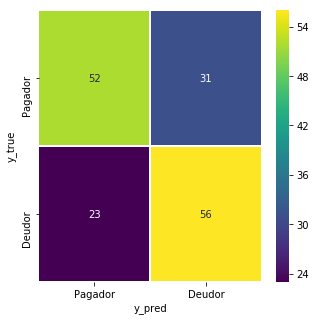

In [133]:
# Accuracy
acc_test1 = accuracy_score(y_test, pred1t)

# Recall
rec_test1 = recall_score(y_test, pred1t) 

# Precision
prec_test1 = precision_score(y_test, pred1t) 

# F1
f1_test1 = f1_score(y_test, pred1t)

# La matriz de confusión (TP, FP, TN, FN)
cm_test1 = confusion_matrix(y_test, pred1t)
FP_test1 = cm_test1[1,0] 
FN_test1 = cm_test1[0,1]
TP_test1 = cm_test1[0,0]
TN_test1 = cm_test1[1,1]

# Gráfico de la matrix
confusion1(y_test, pred1t)

[Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Informa Celular')]

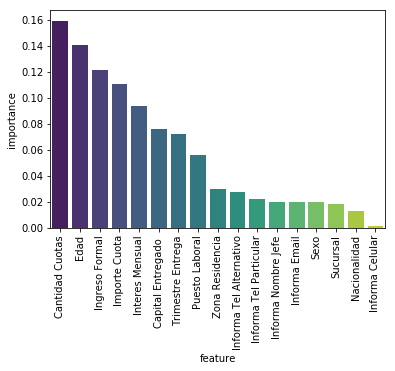

In [134]:
# Importancia de los atributos en el modelo
importances1t = list(zip(modelo1t.feature_importances_, df.columns))
importances1t.sort(reverse=True)
importances1t = pd.DataFrame(importances1t)
importances1t.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importances1t, palette="viridis").set_xticklabels(list(importances1t["feature"]), rotation=90)

<h3>Modelo 2: AdaBoost </h3>

In [135]:
# Entrenamos el modelo
modelo2t = AdaBoostClassifier(base_estimator = DTC, n_estimators=198, random_state=55)
modelo2t.fit(X_dev,y_dev)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best'),
          learning_rate=1.0, n_estimators=198, random_state=55)

In [136]:
# Las predicciones del modelo
pred2t = modelo2t.predict(X_test)

In [138]:
# 5-Folds Cross Validation
X_cv = X_test.copy()
y_cv = y_test.copy()
modelo = modelo2t
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_test2 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_test2,3))

[0.6, 0.667, 0.647, 0.562, 0.516]
Performance f1-score: 0.598


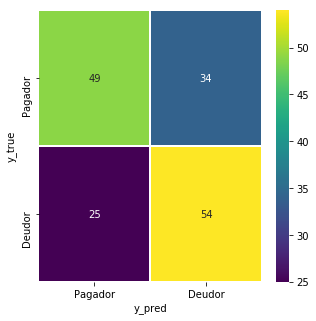

In [139]:
# Accuracy
acc_test2 = accuracy_score(y_test, pred2t)

# Recall
rec_test2 = recall_score(y_test, pred2t) 

# Precision
prec_test2 = precision_score(y_test, pred2t) 

# F1
f1_test2 = f1_score(y_test, pred2t)

# La matriz de confusión (TP, FP, TN, FN)
cm_test2 = confusion_matrix(y_test, pred2t)
FP_test2 = cm_test2[1,0]  # [fila, columna] 
FN_test2 = cm_test2[0,1]
TP_test2 = cm_test2[0,0]
TN_test2 = cm_test2[1,1]

# Gráfico de la matrix
confusion1(y_test, pred2t)

[Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Informa Celular')]

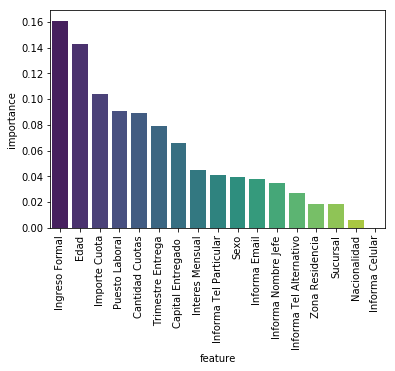

In [140]:
# Importancia de los atributos en el modelo
importances2t = list(zip(modelo2t.feature_importances_, df.columns))
importances2t.sort(reverse=True)
importances2t = pd.DataFrame(importances2t)
importances2t.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importances2t, palette="viridis").set_xticklabels(list(importances2t["feature"]), rotation=90)

<h3>Modelo 3: XGBoost</h3>

In [141]:
# Entrenamos el modelo
modelo3t = xgb.XGBClassifier(max_depth=8, random_state=55, seed=55, colsample_bytree = 0.2357, min_child_weight=2, gamma=0.4, learning_rate=0.24, n_estimators=548, criterion="entropy")
modelo3t.fit(X_dev,y_dev)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2357, criterion='entropy',
       gamma=0.4, learning_rate=0.24, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=548, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=55,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55, silent=None,
       subsample=1, verbosity=1)

In [142]:
# Las predicciones del modelo
pred3t = modelo3t.predict(X_test)

In [143]:
# 5-Folds Cross Validation
X_cv = X_test.copy()
y_cv = y_test.copy()
modelo = modelo3t
k = KFold(n_splits=5, shuffle=False, random_state=55)

sum = 0
metrica_list = []
for train, test in k.split(X_cv):
    Xcv_train = np.array(X_cv)[train]
    Xcv_test = np.array(X_cv)[test]
    ycv_train = np.array(y_cv)[train]
    ycv_test = np.array(y_cv)[test]
    modelo.fit(Xcv_train, ycv_train)
    pred_cv = modelo.predict(Xcv_test)
    metrica_cv = float(f1_score(ycv_test, pred_cv))
    metrica_list.append(round(metrica_cv,3))
    sum += metrica_cv
    cv_test3 = sum/5
print(metrica_list)
print("Performance f1-score:", round(cv_test3,3))

[0.462, 0.621, 0.718, 0.516, 0.483]
Performance f1-score: 0.56


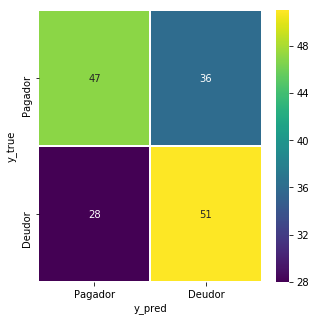

In [144]:
# Accuracy
acc_test3 = accuracy_score(y_test, pred3t)

# Recall
rec_test3 = recall_score(y_test, pred3t) 

# Precision
prec_test3 = precision_score(y_test, pred3t) 

# F1
f1_test3 = f1_score(y_test, pred3t)

# La matriz de confusión (TP, FP, TN, FN)
cm_test3 = confusion_matrix(y_test, pred3t)
FP_test3 = cm_test3[1,0]  # [fila, columna] 
FN_test3 = cm_test3[0,1]
TP_test3 = cm_test3[0,0]
TN_test3 = cm_test3[1,1]

# Gráfico de la matrix
confusion1(y_test, pred3t)

[Text(0, 0, 'Cantidad Cuotas'),
 Text(0, 0, 'Edad'),
 Text(0, 0, 'Ingreso Formal'),
 Text(0, 0, 'Importe Cuota'),
 Text(0, 0, 'Interes Mensual'),
 Text(0, 0, 'Capital Entregado '),
 Text(0, 0, 'Trimestre Entrega'),
 Text(0, 0, 'Puesto Laboral'),
 Text(0, 0, 'Zona Residencia'),
 Text(0, 0, 'Informa Tel Alternativo'),
 Text(0, 0, 'Informa Tel Particular'),
 Text(0, 0, 'Informa Nombre Jefe'),
 Text(0, 0, 'Informa Email'),
 Text(0, 0, 'Sexo'),
 Text(0, 0, 'Sucursal'),
 Text(0, 0, 'Nacionalidad'),
 Text(0, 0, 'Informa Celular')]

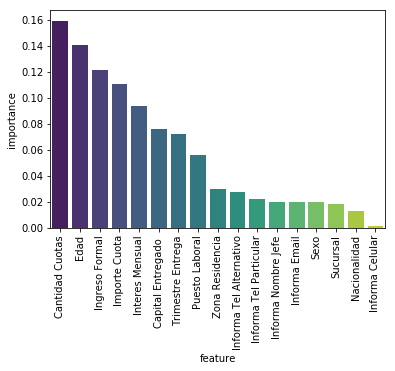

In [145]:
# Importancia de los atributos en el modelo
importances3t = list(zip(modelo1t.feature_importances_, df.columns))
importances3t.sort(reverse=True)
importances3t = pd.DataFrame(importances3t)
importances3t.columns = ["importance","feature"]

sns.barplot(x="feature", y="importance", data=importances3t, palette="viridis").set_xticklabels(list(importances3t["feature"]), rotation=90)

<h2>Comparación</h2>

In [146]:
performance_test1 = [TP_test1, FP_test1, TN_test1, FN_test1, cv_test1, acc_test1, rec_test1, prec_test1, f1_test1]
performance_test2 = [TP_test2, FP_test2, TN_test2, FN_test2, cv_test2, acc_test2, rec_test2, prec_test2, f1_test2]
performance_test3 = [TP_test3, FP_test3, TN_test3, FN_test3, cv_test3, acc_test3, rec_test3, prec_test3, f1_test3]
Medida = ("TP", "FP", "TN", "FN", "5-folds CV (F1)", "Accuracy", "Recall", "Precision", "F1-Socre")

Tabla_test = pd.DataFrame({"Medida": Medida, "Random Forest": performance_test1, "AdaBoost": performance_test2, "XGBoost": performance_test3})

round(Tabla_test,3)

,Medida,Random Forest,AdaBoost,XGBoost
0,TP,52.000,49.000,47.000
1,FP,23.000,25.000,28.000
2,TN,56.000,54.000,51.000
3,FN,31.000,34.000,36.000
4,5-folds CV (F1),0.616,0.598,0.560
5,Accuracy,0.667,0.636,0.605
6,Recall,0.709,0.684,0.646
7,Precision,0.644,0.614,0.586
8,F1-Socre,0.675,0.647,0.614


<h2>Comparación validación y test</h2>

In [147]:
Tabla_todas = pd.DataFrame({"Medida": Medida, "RF Val": performance_valRF2,"RF Test": performance_test1, "AB Val": performance_valAB3,"AB Test": performance_test2, "XGB Val": performance_valXGB3,"XGBoost": performance_test3})

round(Tabla_todas,3)

,Medida,RF Val,RF Test,AB Val,AB Test,XGB Val,XGBoost
0,TP,47.000,52.000,50.000,49.000,38.000,47.000
1,FP,11.000,23.000,5.000,25.000,24.000,28.000
2,TN,60.000,56.000,66.000,54.000,47.000,51.000
3,FN,11.000,31.000,8.000,34.000,20.000,36.000
4,5-folds CV (F1),0.642,0.616,0.647,0.598,0.640,0.560
5,Accuracy,0.829,0.667,0.899,0.636,0.659,0.605
6,Recall,0.845,0.709,0.930,0.684,0.662,0.646
7,Precision,0.845,0.644,0.892,0.614,0.701,0.586
8,F1-Socre,0.845,0.675,0.910,0.647,0.681,0.614
